debug /home/jovyan/work/thesis/TinyOS-Benchmark


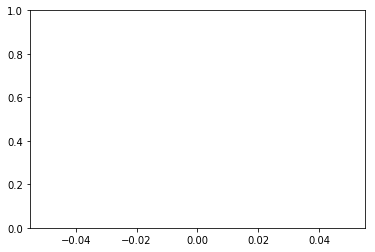

In [11]:
#-*- coding: utf-8 -*-
import pickle
import os
import gc
print('debug', os.getcwd())
def containlogfile(folder):
    ''' Does the folder contain log file?
    Args:
        folder: str
    '''
    
    for e in os.listdir(folder):
        if '.pkl' in e:
            return True        
    return False

data_path = '../TinyOS-Benchmark/preprocessed-dataset/'
paths_data = {}
paths = list(os.walk(data_path))
for i in range(len(paths)):
    #if i > 14: break
    print('{}/{}: {}'.format(i, len(paths), paths[i][0]))
    if containlogfile(paths[i][0]) and paths[i][0] not in paths_data:
        paths_data[paths[i][0]] = []
    for e2 in paths[i][2]:
        fn = os.path.join(paths[i][0], e2)
        with open(fn, 'rb') as f:
            paths_data[paths[i][0]] += pickle.load(f)


def most_tasks(ls, num=5):
    ''' shoot tasks make up the majority in the logs
    Args:
        ls: list, logs look [(timestamp, taskid) ...]
        num: int, the top of task
    Retval:
        ((taskid, number, precent), allprecent, num)
        allprecent is the sum of each prcent in the first item precents  
        num is the number of tasks, len(ls) yet.
    '''
    count = {}
    for e in ls:
        if e[1] in count:
            count[e[1]] += 1
        else:
            count[e[1]] = 1

    count = list(map(lambda k: (k, count[k]), count.keys()))
    count = sorted(count, key=lambda e: e[1], reverse=True)
    count = list(map(lambda e: (e[0], e[1],
                     round(float(e[1]) / len(ls), 2)), count))
    return count[:num], sum(map(lambda e: e[2], count[:num])), len(ls)



import matplotlib.pyplot as plt
plt.figure("plot")

y = []
for k, v in paths_data.items():
    retval = most_tasks(v, 5)
    y.append(sum(map(lambda e: e[2], retval[0])))
plt.ylim(0, 1)
plt.plot(list(range(1, len(y) + 1)), y, marker='o', linestyle=' ')
    
'''
temp_x = 1
for k, v in paths_data.items():
    #print(k, most_tasks(v, 5))
    retval = most_tasks(v, 5)
    y = list(map(lambda e: e[2], retval[0]))
    print(len (y))
    if len(y) < 5: continue
    plt.ylim(0, 1)
    plt.plot([temp_x for i in range(5)], y, marker='o', linestyle=' ')
    temp_x += 1
'''
plt.savefig('feature-by-frequency.png')
plt.show()    